In [56]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [2]:
meine_daten = pd.read_csv("annotated_data/cleaned_annotated_data_training_800.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [3]:
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "NaN"


D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


defaultdict(<class 'list'>, {'knielang': {'neutral': 2, 'negative': 1}, 'Coraggioso-Ir6WKaaMR': {'neutral': 2, 'negative': 1}, 'Pet2020': {'negative': 1}, 'Dirk-H-xIsGPZR': {'negative': 1}, 'HansUlrich': {'neutral': 2, 'negative': 1}, 'Markus-vvb8EOEWg': {'neutral': 2}, 'GuckyCD': {'neutral': 2, 'negative': 1}, 'Hans-hrmkpk6ZR': {'neutral': 2, 'negative': 1}, 'Karl-Ernst -5k_i_MEWg': {'neutral': 2, 'negative': 1}, 'Werner-iFz9kNPWR': {'neutral': 2, 'negative': 1}})


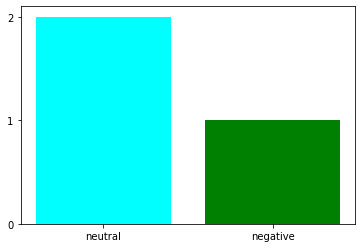

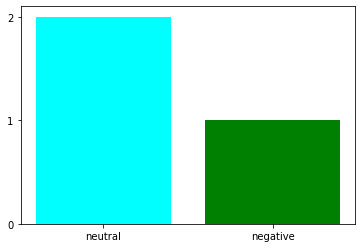

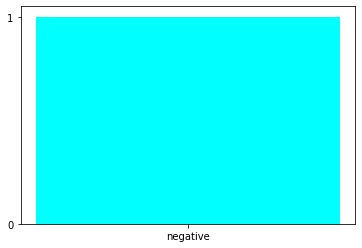

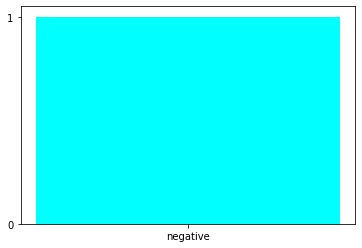

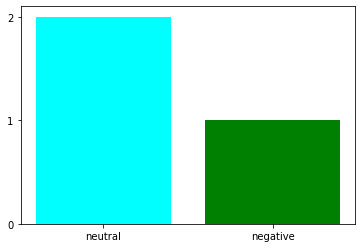

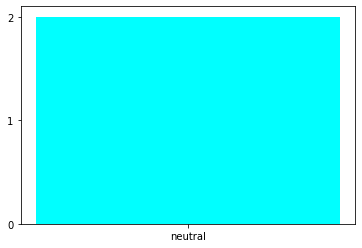

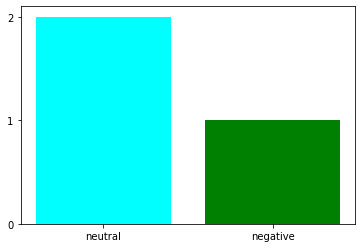

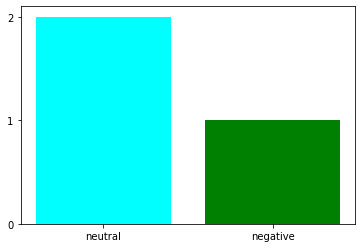

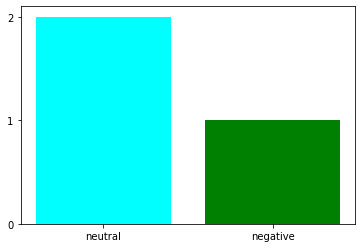

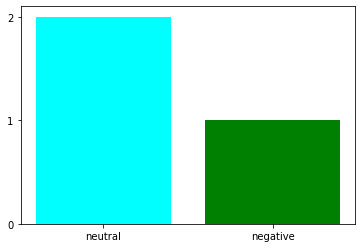

In [63]:



# stores username and the corresponding sentiment
sentiment_person = defaultdict(list)


meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
# print(meine_daten.topic_comment.value_counts())
sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

for username in meine_daten.Username.value_counts().index[:10]:
    liste = list(meine_daten.loc[meine_daten.Username == username]["Sentiment"])
    sentiment_person[username] = liste


for key, value in sentiment_person.items():
    sentiment_person[key] = dict((l, liste.count(l)) for l in set(value))


print(sentiment_person)

for user in sentiment_person:
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    names = list(sentiment_person[user].keys()) 
    values = list(sentiment_person[user].values())

    plt.bar(range(len(sentiment_person[user])), values, tick_label = names, color = ("aqua", "green"))
    plt.show()

In [31]:
print(*sentiment_person)

knielang Coraggioso-Ir6WKaaMR Pet2020 Dirk-H-xIsGPZR HansUlrich Markus-vvb8EOEWg GuckyCD Hans-hrmkpk6ZR Karl-Ernst -5k_i_MEWg Werner-iFz9kNPWR


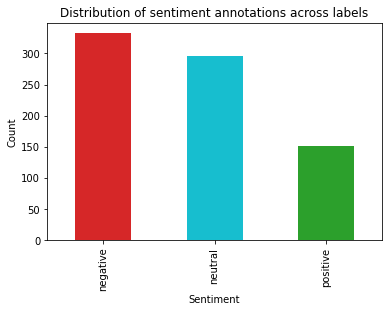

In [14]:
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


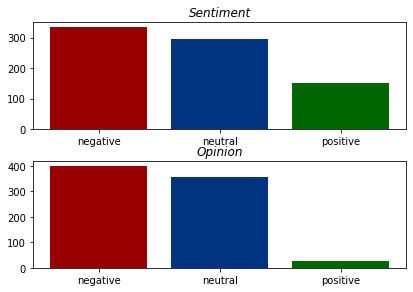

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


In [ ]:
import numpy as np

meine_daten.loc[(meine_daten.Opinion == "positive") & (meine_daten.Sentiment == "negative")]

# meine_daten.Sentiment.value_counts()

# meine_daten.loc[(meine_daten.Sentiment == "positive")]

In [3]:
import sklearn.metrics as metrics

### Cohens Kappa

Formula as follows:

$z = \frac{p_o-p_e}{1-p_e}$

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (...)

https://en.wikipedia.org/wiki/Cohen%27s_kappa

In [4]:
sven_opinion = []
vali_opinion = []

sven_sentiment = []
vali_sentiment = []

# Here we are reading in the data for cohens kappa
 
with open ("annotated_data/svens_agreement.txt") as sven:
    for line in sven:
        sven_opinion.append(line.split("\t")[5])
        sven_sentiment.append(line.split("\t")[6])
with open ("annotated_data/vali_agreement.txt") as vali:
    for line in vali:
        vali_opinion.append(line.split("\t")[5])
        vali_sentiment.append(line.split("\t")[6])

print(sven_sentiment)
print(vali_sentiment)

# We use sklearn method for this 

print(metrics.cohen_kappa_score(sven_opinion, vali_opinion))
metrics.cohen_kappa_score(sven_sentiment, vali_sentiment)


['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral']
['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negat

0.6277145811789038

Reported values for Cohen's Kappa are **0.4782608695652174** and **0.6277145811789038** for Opinion and Sentiment Agreement Respectively.
<br>
<br>
These scores correspond to a specific Strength of Agreement

|Cohen's Kappa statistic   |Strength of Agreement
|---|---|
| 0.00  | Poor  |
|   0.00 - 0.20 | Slight  |
| 0.21 - 0.40  | Fair  |
| 0.41 - 0.60  | Moderate  |
| 0.61 - 0.80  | Substantial  |
| 0.81 - 1.00  | Almost Perfect  |

https://pubmed.ncbi.nlm.nih.gov/15883903/

The scores show **Moderate** and **Substantial** Agreement for Opinion and Sentiment respectivly. 
<br>
Even if these values show that the two annotators agreed in the majority of the cases, the task of annotating sentiment and opinion for a comment at hand was expected to be trivial, expecting higher values for kappa values in both cases.
<br>
By looking at the data, it is assumed that especially the neutral class was most diffcult to annotate and contributed the most to a decrease in score. This is why the following approach will count neutral classes from any annotator as agreeing labels in order to evaluate the difficulty of the neutral class

In [14]:
def kappa_o_neutral(agreements_1, agreements_2):
    """
    this function will return Cohen's Kappa without neutral classes
    :param agreements_1: list of strings
    :param agreements_2: list of strings
    :return: float
    """

    correct_correct = 0
    false_false = 0
    correct_false = 0
    false_correct = 0

    for idx, label in enumerate(agreements_1):

        # all cases where we have a "POS-POS-case"
        # Includes NEUTRAL NEUTRAL, POS POS, POS NEUTRAL, NEUTRAL POS
        if (label == agreements_2[idx] == "positive") or (label == agreements_2[idx] == "neutral") or ((label == "neutral") and (agreements_2[idx] == "positive")) or ((label == "positive") and (agreements_2[idx] == "neutral")):
            correct_correct += 1
        
        # all cases with "POS-NEG-case"
        elif ((label == "positive") and (agreements_2[idx] == "negative")):
            correct_false += 1

        # all cases with "NEG-POS-case"
        elif ((label == "negative") and (agreements_2[idx] == "positive")):
            false_correct += 1

        else:
            false_false += 1

    p_nought = (correct_correct + false_false) / (false_correct + correct_false + correct_correct + false_false)

    p_correct = (correct_correct + correct_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_correct + false_correct) / (correct_correct + correct_false + false_correct + false_false))

    p_incorrect = (false_correct + false_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_false + false_false) / (correct_correct + correct_false + false_correct + false_false))

    p_expected = p_correct + p_incorrect

    kappa = (p_nought - p_expected) / (1 - p_expected)

    print(p_nought, p_incorrect, p_correct)

    return kappa

kappa_o_neutral(vali_sentiment, sven_sentiment)

21 39 0 0
1.0 0.42250000000000004 0.12249999999999998


1.0